In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('../../../../DataSets/dataset_merged.csv')

In [59]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'],format=r"%Y-%m-%d %H:%M:%S")
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'],format=r"%Y-%m-%d %H:%M:%S")

In [60]:
df.columns

Index(['Unnamed: 0', 'trip_start_timestamp', 'unique_key', 'taxi_id',
       'trip_start_timestamp.1', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_community_area', 'dropoff_community_area', 'fare',
       'tips', 'extras', 'trip_total', 'payment_type', 'date', 'DateTime',
       'daytype', 'temperature', 'relative_humidity', 'wind_direction',
       'wind_speed', 'precipitation', 'sky_level'],
      dtype='object')

In [61]:
df.index = df['trip_start_timestamp']

In [62]:
#Drop missing values of 2017-01-01 and 30 samples from 2019-12-01. I dont know why it was still there
df = df[~df['temperature'].isna()]
df = df[~df['daytype'].isna()]
df = df[~(df['trip_start_timestamp'] == '2019-12-01')]

In [63]:
df.isna().sum()

Unnamed: 0                0
trip_start_timestamp      0
unique_key                0
taxi_id                   0
trip_start_timestamp.1    0
trip_end_timestamp        0
trip_seconds              0
trip_miles                0
pickup_community_area     0
dropoff_community_area    0
fare                      0
tips                      0
extras                    0
trip_total                0
payment_type              0
date                      0
DateTime                  0
daytype                   0
temperature               0
relative_humidity         0
wind_direction            0
wind_speed                0
precipitation             0
sky_level                 0
dtype: int64

In [64]:
df.head()

,Unnamed: 0,trip_start_timestamp,unique_key,taxi_id,trip_start_timestamp.1,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,...,payment_type,date,DateTime,daytype,temperature,relative_humidity,wind_direction,wind_speed,precipitation,sky_level
trip_start_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-19 13:30:00,0,2019-01-19 13:30:00,977e465c878cd5337c2215e291ecf091cf2ef4a6,84dab24222c24f99f6c543a5d02e5b47940df071fef3ed...,2019-01-19 13:30:00,2019-01-19 13:30:00,19.0,0.1,14,14,...,Cash,01/19/2019,2019-01-19 13:30:00+00:00,A,25.0,84.53,30.0,21.0,0.0,OVC
2019-01-24 07:15:00,1,2019-01-24 07:15:00,f9eb08f49f09e56188333a95bea1d9d7220a79a9,15ba3f3c77572f9fe6f7cd47e70fa31af10194449cc975...,2019-01-24 07:15:00,2019-01-24 07:30:00,328.0,1.1,14,14,...,Cash,01/24/2019,2019-01-24 07:15:00+00:00,W,10.0,87.37,240.0,6.0,0.0,FEW
2019-02-07 21:45:00,2,2019-02-07 21:45:00,6c40ff49c9e05b30bef35ba2c0c0639fe3506127,b259515344f28837cc7546ff185da59066c4aa0c2ad490...,2019-02-07 21:45:00,2019-02-07 21:45:00,213.0,0.9,14,14,...,Cash,02/07/2019,2019-02-07 21:45:00+00:00,W,18.0,67.33,250.0,22.0,0.0,OVC
2019-02-20 18:00:00,3,2019-02-20 18:00:00,4c0c28580737e54f83246154655e06344e27897c,6551ba527f916e0b8187165d7e61705fc2641c9b3afd69...,2019-02-20 18:00:00,2019-02-20 18:00:00,348.0,0.9,14,14,...,Cash,02/20/2019,2019-02-20 18:00:00+00:00,W,37.0,81.93,230.0,12.0,0.0,OVC
2019-02-13 08:30:00,4,2019-02-13 08:30:00,b01e270fa78b2b711a606dfd41bc7bb10ce2e460,98218edd8c1afe2aa636693c931d34e5bdd76df10e1b6a...,2019-02-13 08:30:00,2019-02-13 08:45:00,435.0,0.8,14,14,...,Cash,02/13/2019,2019-02-13 08:30:00+00:00,W,10.9,88.21,260.0,14.0,0.0,FEW


In [65]:
df_grouped = df.groupby([pd.Grouper(freq='H'),'pickup_community_area']).count()

In [66]:
df_grouped.head()

Unnamed: 0  trip_start_timestamp  \
trip_start_timestamp pickup_community_area                                     
2017-01-02           1                               2                     2   
                     2                               2                     2   
                     3                               4                     4   
                     4                               3                     3   
                     5                               1                     1   

                                            unique_key  taxi_id  \
trip_start_timestamp pickup_community_area                        
2017-01-02           1                               2        2   
                     2                               2        2   
                     3                               4        4   
                     4                               3        3   
                     5                               1        1   

                                            trip_start_timestamp.1  \
trip_start_timestamp pickup_community_area                           
2017-01-02           1                                           2   
                     2                                           2   
                     3                                           4   
                     4                                           3   
                     5                                           1   

                                            trip_end_timestamp  trip_seconds  \
trip_start_timestamp pickup_community_area                                     
2017-01-02           1                                       2             2   
                     2                                       2             2   
                     3                                       4             4   
                     4                                       3             3   
                     5                                       1             1   

                                            trip_miles  \
trip_start_timestamp pickup_community_area               
2017-01-02           1                               2   
                     2                               2   
                     3                               4   
                     4                               3   
                     5                               1   

                                            dropoff_community_area  fare  ...  \
trip_start_timestamp pickup_community_area                                ...   
2017-01-02           1                                           2     2  ...   
                     2                                           2     2  ...   
                     3                                           4     4  ...   
                     4                                           3     3  ...   
                     5                                           1     1  ...   

                                            payment_type  date  DateTime  \
trip_start_timestamp pickup_community_area                                 
2017-01-02           1                                 2     2         2   
                     2                                 2     2         2   
                     3                                 4     4         4   
                     4                                 3     3         3   
                     5                                 1     1         1   

                                            daytype  temperature  \
trip_start_timestamp pickup_community_area                         
2017-01-02           1                            2            2   
                     2                            2            2   
                     3                            4            4   
                     4                            3            3   
                     5                       

In [67]:
series_y = df_grouped['Unnamed: 0']
final_df = pd.DataFrame(index = df_grouped.index,columns = ['Trips'])
final_df['Trips'] = series_y

In [68]:
final_df

Trips
trip_start_timestamp pickup_community_area       
2017-01-02 00:00:00  1                          2
                     2                          2
                     3                          4
                     4                          3
                     5                          1
...                                           ...
2019-11-30 23:00:00  32                        28
                     33                         1
                     56                         4
                     76                        54
                     77                         3

[659245 rows x 1 columns]

We realize that there are a lot of hours with missing community areas:


In [69]:
tmp = df.groupby(pd.Grouper(freq='H'))
tmp = tmp.agg({"pickup_community_area": "nunique"})
tmp = tmp.reset_index()

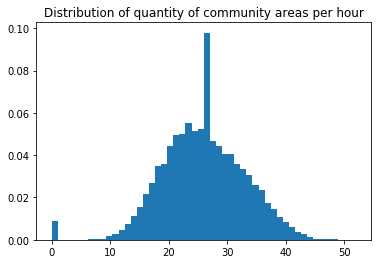

In [70]:
plt.hist(tmp['pickup_community_area'], density = True, bins= 50)
plt.title('Distribution of quantity of community areas per hour')
plt.show()

So we will create a dataframe with all hours and all community areas:

In [71]:
hours = df_grouped.index.get_level_values(0).unique()

In [72]:
index_hours = []
index_ca = []
for h in hours:
    index_hours += [h] * 77
    index_ca += range(1,78)

In [73]:
final_df_preprocessed = pd.DataFrame(index=[index_hours,index_ca])

In [74]:
final_df_preprocessed.index.names = ['trip_start_timestamp','pickup_community_area']

In [75]:
final_df_preprocessed['Trips'] = 0

In [76]:
final_df_preprocessed = final_df_preprocessed.add(final_df,fill_value=0)
final_df_preprocessed['Trips'] = final_df_preprocessed['Trips'].astype('int32')

In [77]:
del(final_df)
final_df = final_df_preprocessed

In [78]:
final_df

Trips
trip_start_timestamp pickup_community_area       
2017-01-02 00:00:00  1                          2
                     2                          2
                     3                          4
                     4                          3
                     5                          1
...                                           ...
2019-11-30 23:00:00  73                         0
                     74                         0
                     75                         0
                     76                        54
                     77                         3

[1945944 rows x 1 columns]

In [79]:
weather_info = df.groupby([pd.Grouper(freq='H'),'pickup_community_area']).mean()[['temperature','relative_humidity','wind_direction','wind_speed','precipitation']]

In [80]:
hours = final_df.index.get_level_values(0).unique()

In [81]:
temp = []
humidity = []
wind_dir = []
wind_speed = []
precipitation = []
skyLevel = []
dayType = []

for i in range(len(hours)):
    sample_group = weather_info.loc[hours[i]].iloc[0]
    
    try:
        sample = df.loc[hours[i]]
        if isinstance(sample,pd.DataFrame):
            sample = sample.iloc[0]
    except:
        mask = (df['trip_start_timestamp'] > hours[i]) & (df['trip_start_timestamp'] < hours[i+1])
        sample = df[mask].iloc[0]
    temp += [sample_group['temperature']] * 77
    humidity += [sample_group['relative_humidity']] * 77
    wind_dir += [sample_group['wind_direction']] * 77
    wind_speed += [sample_group['wind_speed']] * 77
    precipitation += [sample_group['precipitation']] * 77
    try:
        skyLevel += [sample['sky_level']] * 77
    except:
        print(i)
        print(sample)
    dayType += [sample['daytype']] * 77

In [82]:
final_df['temperature'] = temp
final_df['relative_humidity'] = humidity
final_df['wind_direction'] = wind_dir
final_df['wind_speed'] = wind_speed
final_df['precipitation'] = precipitation
final_df['daytype'] = dayType
final_df['sky_level'] = skyLevel
del(temp)
del(humidity)
del(wind_dir)
del(wind_speed)
del(precipitation)
del(skyLevel)

In [83]:
final_df

Trips  temperature  \
trip_start_timestamp pickup_community_area                       
2017-01-02 00:00:00  1                          2         28.9   
                     2                          2         28.9   
                     3                          4         28.9   
                     4                          3         28.9   
                     5                          1         28.9   
...                                           ...          ...   
2019-11-30 23:00:00  73                         0         39.9   
                     74                         0         39.9   
                     75                         0         39.9   
                     76                        54         39.9   
                     77                         3         39.9   

                                            relative_humidity  wind_direction  \
trip_start_timestamp pickup_community_area                                      
2017-01-02 00:00:00  1                                  82.00            50.0   
                     2                                  82.00            50.0   
                     3                                  82.00            50.0   
                     4                                  82.00            50.0   
                     5                                  82.00            50.0   
...                                                       ...             ...   
2019-11-30 23:00:00  73                                 96.55             0.0   
                     74                                 96.55             0.0   
                     75                                 96.55             0.0   
                     76                                 96.55             0.0   
                     77                                 96.55             0.0   

                                            wind_speed  precipitation daytype  \
trip_start_timestamp pickup_community_area                                      
2017-01-02 00:00:00  1                             5.0           0.00       U   
                     2                             5.0           0.00       U   
                     3                             5.0           0.00       U   
                     4                             5.0           0.00       U   
                     5                             5.0           0.00       U   
...                                                ...            ...     ...   
2019-11-30 23:00:00  73                            0.0           1.78       A   
                     74                            0.0           1.78       A   
                     75                            0.0           1.78       A   
                     76                            0.0           1.78       A   
                     77                            0.0           1.78       A   

                                           sky_level  
trip_start_timestamp pickup_community_area            
2017-01-02 00:00:00  1                           FEW  
                     2                           FEW  
                     3                           FEW  
                     4                           FEW  
                     5                           FEW  
...                                              ...  
2019-11-30 23:00:00  73                          BKN  
                     74                          BKN  
                     75                          BKN  
                     76                          BKN  
                     77                          BKN  

[1945944 rows x 8 columns]

In [84]:
final_df.loc[:,'trip_start_timestamp'] = final_df.index.get_level_values(0)

In [85]:
final_df.loc[:,'pickup_community_area'] = final_df.index.get_level_values(1)

### Feature Engineering

**Year,Hour, Day , Quarter, Month, First Half Month**

In [3]:
final_df = pd.read_csv('../../../../DataSets/dataset_final.csv')

final_df['trip_start_timestamp'] = pd.to_datetime(final_df['trip_start_timestamp'],format=r"%Y-%m-%d %H:%M:%S")

final_df.index = [final_df['trip_start_timestamp'],final_df['pickup_community_area']]

final_df.drop(columns=['pickup_community_area.1','trip_start_timestamp.1'],inplace=True)

In [5]:
final_df.loc[:,'Year'] = final_df['trip_start_timestamp'].dt.year

In [86]:
final_df.loc[:,'Day Name'] = final_df['trip_start_timestamp'].dt.day_name()

In [9]:
final_df.loc[:,'Day Number'] = final_df['trip_start_timestamp'].dt.day

In [14]:
final_df.loc[:,'First Half Month'] = 0
final_df.loc[final_df['Day Number'] <= 15,'First Half Month'] = 1

In [87]:
final_df.loc[:,'Month'] = final_df['trip_start_timestamp'].dt.month

In [88]:
final_df.loc[:,'Hour'] = final_df['trip_start_timestamp'].dt.hour

In [89]:
final_df.loc[:,'Quarter'] = final_df['trip_start_timestamp'].dt.quarter

**Fare and Tips**

In [90]:
# Fare from the last month per community area
# Group by by month and community area and sum
income_grouped = df.groupby([pd.Grouper(freq='M'),'pickup_community_area'])[['fare','tips']].sum()

In [91]:
income_grouped

fare      tips
trip_start_timestamp pickup_community_area                     
2017-01-31           1                       32055.00   1485.59
                     2                       36413.10   1224.73
                     3                       65230.40   3568.52
                     4                       46732.45   2536.66
                     5                       33088.75   1832.27
...                                               ...       ...
2019-11-30           73                       8522.25     21.01
                     74                       1086.25      3.00
                     75                       6882.00      7.50
                     76                     396184.75  58154.33
                     77                      41375.75   2482.07

[2695 rows x 2 columns]

In [92]:
final_df['Fare Last Month'] = 0
final_df['Tips Last Month'] = 0

In [93]:
for month, ca in income_grouped.index:
    
    fare = income_grouped.loc[(month,ca),'fare']
    tips = income_grouped.loc[(month,ca),'tips']
    maskMonth = (final_df['trip_start_timestamp'] <= month) & (final_df['trip_start_timestamp'] >= (month - pd.offsets.MonthBegin(1)) )
    
    final_df.loc[(maskMonth,ca),'Fare Last Month'] = fare
    final_df.loc[(maskMonth,ca),'Tips Last Month'] = tips

In [94]:
final_df[:80]

Trips  temperature  \
trip_start_timestamp pickup_community_area                       
2017-01-02 00:00:00  1                          2         28.9   
                     2                          2         28.9   
                     3                          4         28.9   
                     4                          3         28.9   
                     5                          1         28.9   
...                                           ...          ...   
                     76                        19         28.9   
                     77                         5         28.9   
2017-01-02 01:00:00  1                          6         30.0   
                     2                          2         30.0   
                     3                          6         30.0   

                                            relative_humidity  wind_direction  \
trip_start_timestamp pickup_community_area                                      
2017-01-02 00:00:00  1                                   82.0            50.0   
                     2                                   82.0            50.0   
                     3                                   82.0            50.0   
                     4                                   82.0            50.0   
                     5                                   82.0            50.0   
...                                                       ...             ...   
                     76                                  82.0            50.0   
                     77                                  82.0            50.0   
2017-01-02 01:00:00  1                                   78.4            50.0   
                     2                                   78.4            50.0   
                     3                                   78.4            50.0   

                                            wind_speed  precipitation daytype  \
trip_start_timestamp pickup_community_area                                      
2017-01-02 00:00:00  1                             5.0            0.0       U   
                     2                             5.0            0.0       U   
                     3                             5.0            0.0       U   
                     4                             5.0            0.0       U   
                     5                             5.0            0.0       U   
...                                                ...            ...     ...   
                     76                            5.0            0.0       U   
                     77                            5.0            0.0       U   
2017-01-02 01:00:00  1                             4.0            0.0       U   
                     2                             4.0            0.0       U   
                     3                             4.0            0.0       U   

                                           sky_level trip_start_timestamp  \
trip_start_timestamp pickup_community_area                                  
2017-01-02 00:00:00  1                           FEW  2017-01-02 00:00:00   
                     2                           FEW  2017-01-02 00:00:00   
                     3                           FEW  2017-01-02 00:00:00   
                     4                           FEW  2017-01-02 00:00:00   
                     5                           FEW  2017-01-02 00:00:00   
...                                              ...                  ...   
                     76                          FEW  2017-01-02 00:00:00   
                     77                          FEW  2017-01-02 00:00:00   
2017-01-02 01:00:00  1                           FEW  2017-01-02 01:00:00   
                     2                           FEW  2017-01-02 01:00:00   
                     3                           FEW  2017-01-02 01:00:00   

                                            pickup_community_area Day Name 

**Demand of last hour, last week and two weeks ago (same hour)**

In [95]:
final_df['Trips Last Hour'] = np.NAN
final_df['Trips Last Week (Same Hour)'] = np.NAN
final_df['Trips 2 Weeks Ago (Same Hour)'] = np.NAN

In [96]:
trips = final_df['Trips'].values
trips_lastHour = np.insert(trips,0,[0] * 77)
trips_lastHour = trips_lastHour[:-77]

In [97]:
final_df['Trips Last Hour'] = trips_lastHour

In [98]:
# Check if it is correct
print(final_df.loc[("2018-04-07 10:00:00",76),'Trips Last Hour'][0] == final_df.loc[("2018-04-07 09:00:00",76),'Trips'][0])
print(final_df.loc[("2017-09-18 17:00:00",76),'Trips Last Hour'][0] == final_df.loc[("2017-09-18 16:00:00",76),'Trips'][0])

True
True


In [99]:
offset = (7 * 24) * 77 # 7 days * 24 hours * 77 community areas
trips_lastWeekHour = np.insert(trips,0,[0] * offset)
trips_lastWeekHour = trips_lastWeekHour[:-offset]

In [100]:
final_df['Trips Last Week (Same Hour)'] = trips_lastWeekHour

In [101]:
# Check if it is correct
print(final_df.loc[("2018-04-07 10:00:00",76),'Trips Last Week (Same Hour)'][0] == final_df.loc[("2018-03-31 10:00:00",76),'Trips'][0])
print(final_df.loc[("2017-09-18 17:00:00",76),'Trips Last Week (Same Hour)'][0] == final_df.loc[("2017-09-11 17:00:00",76),'Trips'][0])

True
True


In [102]:
offset = (14 * 24) * 77 # 14 days * 24 hours * 77 community areas
trips_last2WeeksHour = np.insert(trips,0,[0] * offset)
trips_last2WeeksHour = trips_last2WeeksHour[:-offset]

In [103]:
final_df['Trips 2 Weeks Ago (Same Hour)'] = trips_last2WeeksHour

In [104]:
# Check if it is correct
print(final_df.loc[("2018-04-07 10:00:00",76),'Trips 2 Weeks Ago (Same Hour)'][0] == final_df.loc[("2018-03-24 10:00:00",76),'Trips'][0])
print(final_df.loc[("2017-09-18 17:00:00",76),'Trips 2 Weeks Ago (Same Hour)'][0] == final_df.loc[("2017-09-04 17:00:00",76),'Trips'][0])

True
True


As we are using information from the last two week, we delete the samples related to the first two weeks of the dataset

In [105]:
final_df = final_df.iloc[offset:]

In [15]:
final_df.describe()

,pickup_community_area,Trips,temperature,relative_humidity,wind_direction,wind_speed,Month,Hour,Quarter,Fare Last Month,Tips Last Month,Trips Last Hour,Trips Last Week (Same Hour),Trips 2 Weeks Ago (Same Hour),precipitation_cat,Year,Day Number,First Half Month
count,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06,1.920072e+06
mean,3.900000e+01,3.617773e+00,5.201587e+01,6.746962e+01,1.793512e+02,8.402790e+00,6.449110e+00,1.149976e+01,2.491057e+00,3.510545e+04,3.698450e+03,3.617783e+00,3.636048e+00,3.645365e+00,8.509785e-02,2.017991e+03,1.570881e+01,4.907363e-01
std,2.222612e+01,1.618783e+01,2.058607e+01,1.718264e+01,1.099088e+02,4.542183e+00,3.331762e+00,6.922553e+00,1.097545e+00,1.136254e+05,1.424471e+04,1.618783e+01,1.626148e+01,1.630018e+01,3.902394e-01,8.071873e-01,8.746271e+00,4.999143e-01
min,1.000000e+00,0.000000e+00,-2.310000e+01,1.223000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03,1.000000e+00,0.000000e+00
25%,2.000000e+01,0.000000e+00,3.600000e+01,5.551000e+01,7.000000e+01,5.000000e+00,4.000000e+00,5.750000e+00,2.000000e+00,1.079250e+03,6.260000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03,8.000000e+00,0.000000e+00
50%,3.900000e+01,0.000000e+00,5.200000e+01,6.864000e+01,2.000000e+02,8.000000e+00,6.000000e+00,1.150000e+01,2.000000e+00,3.060500e+03,3.515000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.018000e+03,1.600000e+01,0.000000e+00
75%,5.800000e+01,1.000000e+00,7.000000e+01,8.127000e+01,2.700000e+02,1.100000e+01,9.000000e+00,1.725000e+01,3.000000e+00,1.117175e+04,4.667700e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.019000e+03,2.300000e+01,1.000000e+00
max,7.700000e+01,5.060000e+02,9.700000e+01,1.000000e+02,3.600000e+02,3.300000e+01,1.200000e+01,2.300000e+01,4.000000e+00,9.360422e+05,1.141725e+05,5.060000e+02,5.060000e+02,5.060000e+02,5.000000e+00,2.019000e+03,3.100000e+01,1.000000e+00


In [16]:
final_df['trip_start_timestamp'] = final_df['trip_start_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [17]:
final_df.to_csv('../../../../DataSets/dataset_final.csv')